In [1]:
import os, time, cv2, math
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import cv2
from skimage.morphology import disk
from skimage.filters import median
import time

import konfokal_lib as kl

In [2]:
home_dir = os.path.abspath("") + os.sep

files = { 'before': { 'filename': 'C3S-Balken z-Daten_vorher.asc', 'clip_min':-25000, 'clip_max':15000},
		  'after': { 'filename': 'C3S-Balken z-Daten_nachher.asc', 'clip_min':-25000, 'clip_max':15000} }

loading 'C3S-Balken C3S-Balken z-Daten_vorher.asc'
x/y-scale: 1289.476 nm/px
dataset size: 3177270.0 x 18244802.4 nm
Min: -168136, Max: 92664, Mean: -0.000527


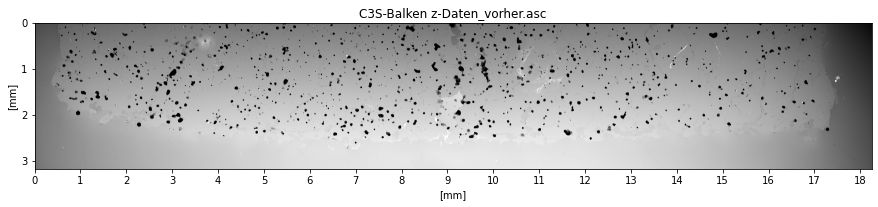

[0.0, 775.5085340559663, 1551.0170681119325, 2326.525602167899] [0, 1, 2, 3]


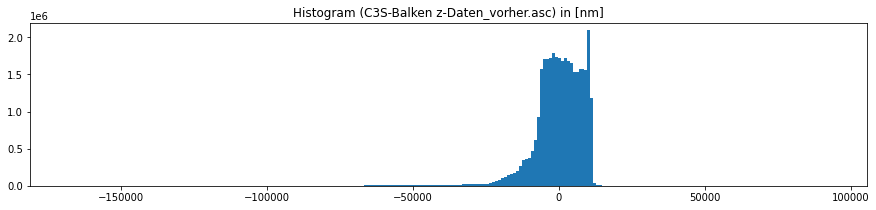

In [3]:
files['before'] = kl.load_file(files['before'])

loading 'C3S-Balken C3S-Balken z-Daten_nachher.asc'
x/y-scale: 1289.477 nm/px
dataset size: 3178560.0 x 18244805.5 nm
Min: -125275, Max: 54998, Mean: 0.004057


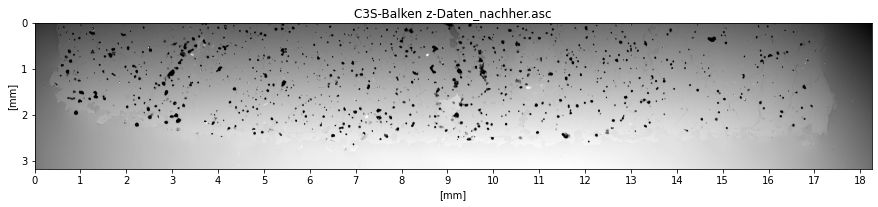

[0.0, 775.5084063223597, 1551.0168126447195, 2326.525218967079] [0, 1, 2, 3]


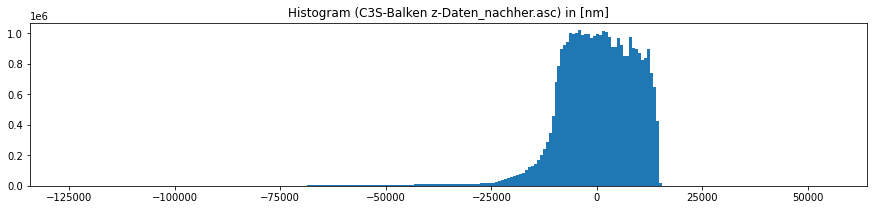

In [4]:
files['after'] = kl.load_file(files['after'])

In [5]:

print(files['before']['data'].shape)

(14149, 2464)


(5000, 2464)


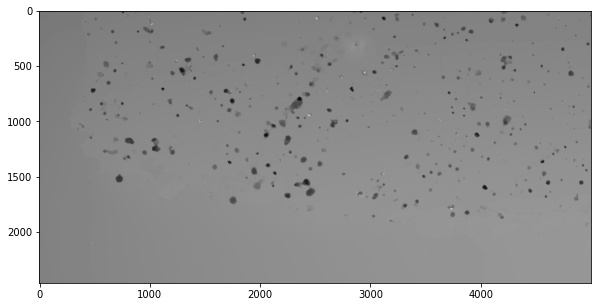

132


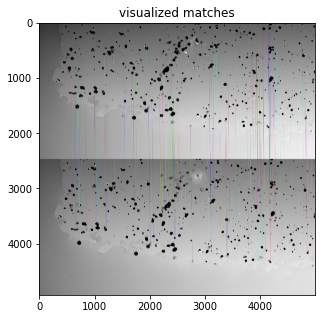

In [6]:

# use if image is loaded without flipping it vertically
x0 = 0000 #+ 12000
x1 = 5000 #+ 12000 #full_aligned.shape[0]
"""
x0 = 0000 + 11500
x1 = 2500 + 11500 #full_aligned.shape[0]
"""
# use full height
y0 = 0000
y1 = 2464 #full_aligned.shape[1]

files['before']['thumb'] = files['before']['thumb'][x0:x1,y0:y1]
files['after']['thumb']  = files['after']['thumb'][x0:x1,y0:y1]
files['before']['data']  = files['before']['data'][x0:x1,y0:y1]
files['after']['data']   = files['after']['data'][x0:x1,y0:y1]

print(files['before']['data'].shape)

plt.figure(figsize = (15,5))
plt.imshow( np.rot90(files['before']['data']), cmap='gray' )
plt.show()

H, aligned = kl.align_images(files['before']['thumb'], files['after']['thumb'])
(h, w) = files['before']['data'].shape[:2]
full_aligned = cv2.warpPerspective(files['before']['data'], H, (w, h))


difference = files['after']['data'][0:full_aligned.shape[0],0:full_aligned.shape[1]]-full_aligned[0:full_aligned.shape[0],0:full_aligned.shape[1]]

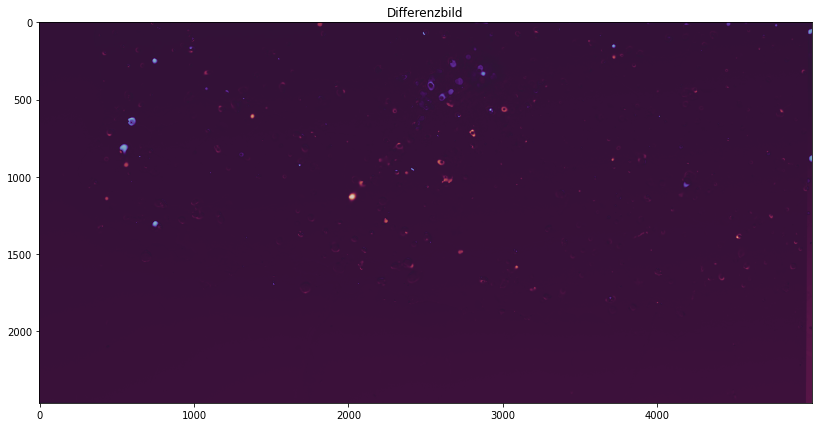

In [7]:
plt.figure(figsize = (20,7))
plt.title("Differenzbild")
plt.imshow( np.rot90(difference), cmap='twilight' )#, cmap='gray'
plt.show()

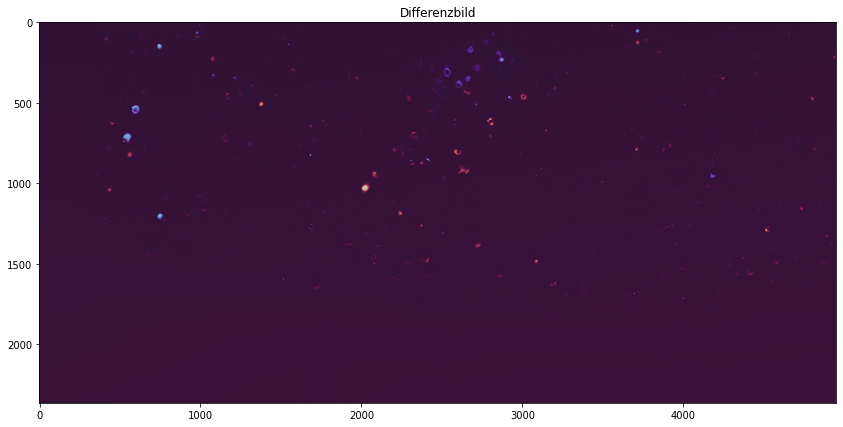

In [8]:
difference   = difference[  0:difference.shape[0]-50,0   : difference.shape[1]-100]
full_aligned = full_aligned[0:full_aligned.shape[0]-50,0 : full_aligned.shape[1]-100]
files['before']['data'] = files['before']['data'][0:files['before']['data'].shape[0]-50,0 : files['before']['data'].shape[1]-100]

plt.figure(figsize = (20,7))
plt.title("Differenzbild")
plt.imshow( np.rot90(difference), cmap='twilight' )#, cmap='gray'
plt.show()

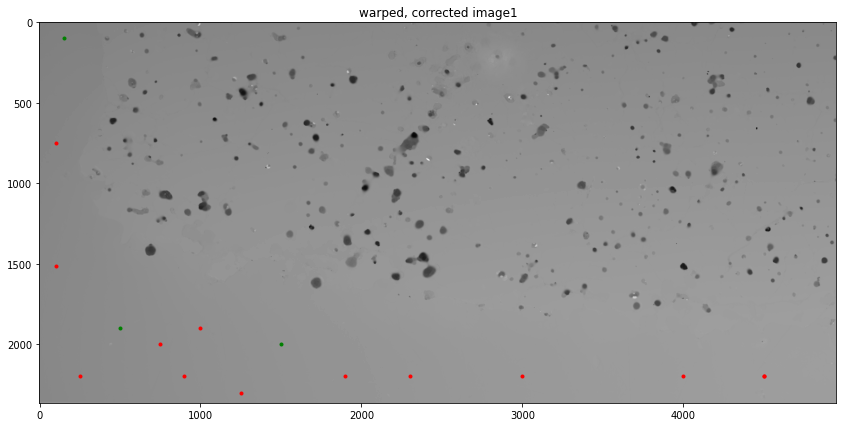

In [9]:
# use if image is loaded without flipping it vertically

points = np.array( [
	(150,100),
	(1500,2000),
	(4500,2200),
	
	(500,1900),
	(2300,2200),
	(250,2200),
	(100,750),
	(100,1515),
	(750,2000),
	(1250,2300),
	(1000,1900),
	(900,2200),
	(1900,2200),

	(3000,2200),
	(4500,2200),
	(4000,2200),
] )

"""
points = np.array( [
	#(350, 200),
	#(250, 1550),
	#(1700,1700),
	#(1560,450)
	#(350, 200),
	(550, 2100),
	(1200,2100),
	(2200,2000),
	(2200,1200),
	(2200,500)
] )
p0 = (550, 2100)
p1 = (2200,2000)
p2 = (2200,500)
"""
buffer = 20
i=0
plt.figure(figsize = (20,7))
plt.title("warped, corrected image1")
plt.imshow( np.rot90(full_aligned), cmap='gray' )
for p in points:
	if i<3:
		plt.plot(p[0], p[1], marker='.', color="green")
	else:
		plt.plot(p[0], p[1], marker='.', color="red")
	i+=1
plt.show()

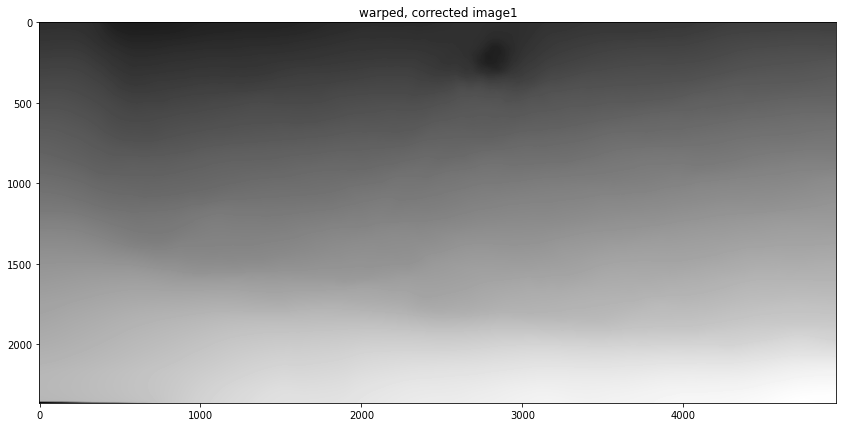

In [10]:
## down sizing
## i don't get, why the x and y diemensions are flipped in the size tuple in cv2.resize()
#median_img = cv2.resize(full_aligned, (int(full_aligned.shape[1]/4), int(full_aligned.shape[0]/4)))
#median_img1 = cv2.resize(files['before']['data'], (int(files['before']['data'].shape[1]/4), int(files['before']['data'].shape[0]/4)))

## mean-processsing
#median_img  = median(median_img,  disk(51))
#median_img1 = median(median_img1, disk(51))
#median_img = median_img1 - median_img

median_img = cv2.resize(difference, (int(difference.shape[1]/4), int(difference.shape[0]/4)))

median_img = median(median_img, disk(51))

# re-upsizing
# i don't get, why the x and y diemensions are flipped in the size tuple in cv2.resize()
#print((full_aligned.shape[0], full_aligned.shape[1]))
median_img = cv2.resize(median_img, (full_aligned.shape[1], full_aligned.shape[0])) #

plt.figure(figsize = (20,7))
plt.title("warped, corrected image1")
plt.imshow( np.rot90(  (median_img) ), cmap='gray' )
#for p in points:
#	plt.plot(p[0], p[1], marker='.', color="red")
plt.show()

new point 150 100 383 std dev: 0.8299610213853904
new point 1500 2000 -2990 std dev: 5.890405060941839
new point 500 1900 -2911 std dev: 6.9408145724571435
new point 2300 2200 -3265 std dev: 4.483439267325743
new point 250 2200 -3174 std dev: 7.0071543199277775
new point 100 750 -445 std dev: 4.695975531661236
new point 100 1515 -1988 std dev: 6.339042238424483
new point 750 2000 -3145 std dev: 5.4430621189118265
new point 1250 2300 -3669 std dev: 7.181362084853636
new point 1000 1900 -2872 std dev: 6.202161083055382
new point 900 2200 -3514 std dev: 7.516250719656487
new point 1900 2200 -3287 std dev: 4.83624861533717
new point 3000 2200 -3371 std dev: 6.460011302003781
new point 4500 2200 -2664 std dev: 6.986807332394152
new point 4000 2200 -2864 std dev: 5.282549265891615
new point 4500 2200 -2664 std dev: 6.986807332394152
0.07642680632800367 -0.8933757346644672 -0.4427626226176114 376.5401156957632


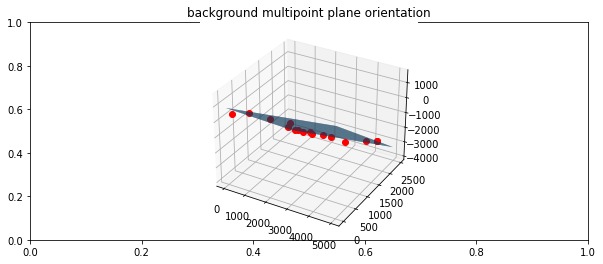

In [11]:
background, points = kl.get_multipoint_plane( median_img, points, files['after']['data'].shape )

In [12]:
a, b = kl.get_min_dim(background, files['after']['data'])
result = files['after']['data'][:a,:b]-background[:a,:b]

a, b = kl.get_min_dim(background, difference)
corrected_difference = difference[:a,:b]-background[:a,:b]

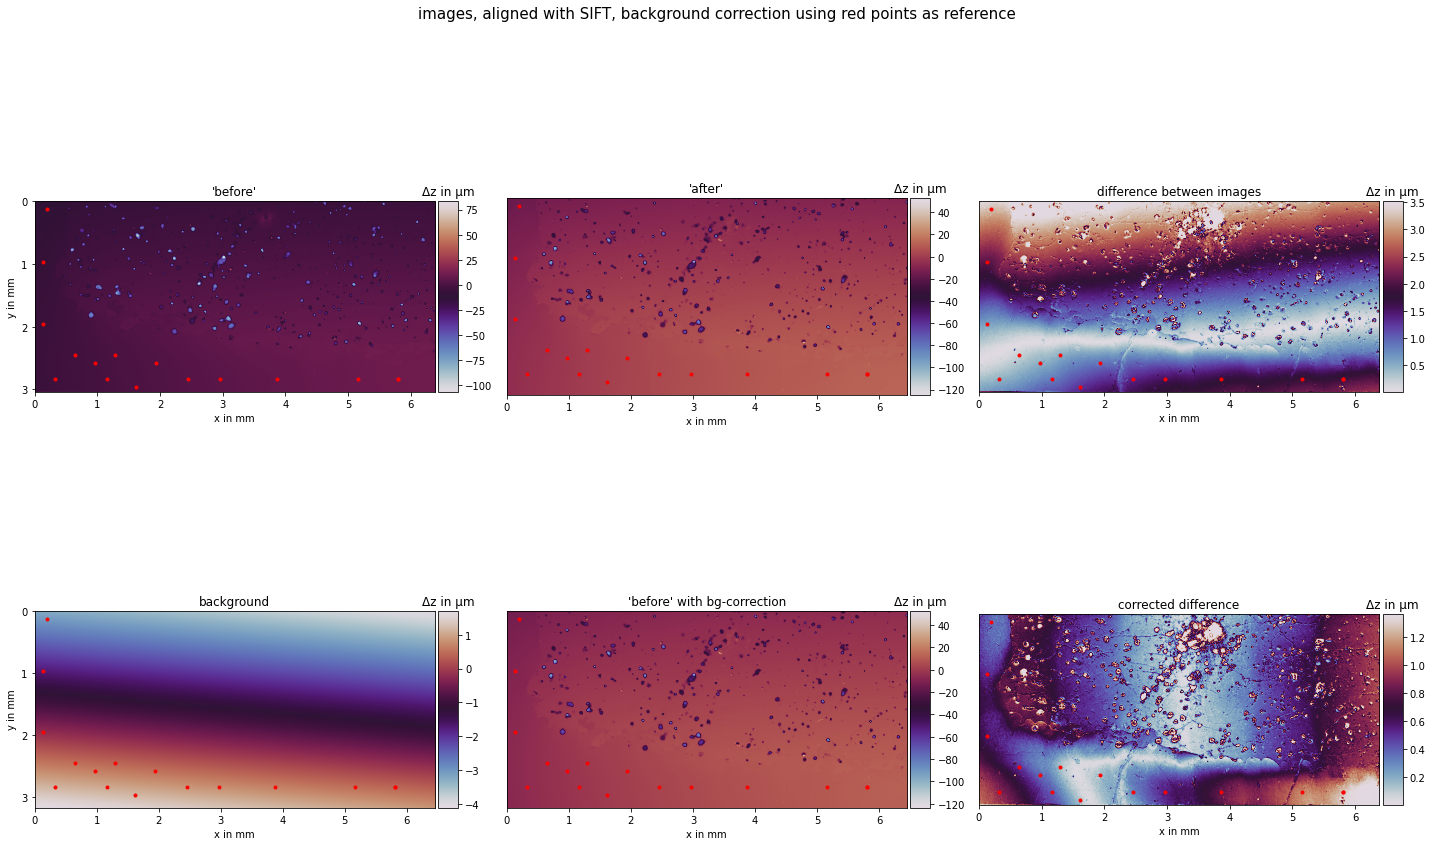

In [13]:
marker_color = "red"
cmap		 = 'twilight'

images = {	"'before'": full_aligned, 
			"'after'":  files['after']['data'],
			"difference between images": np.abs(difference),
			"background":background, 
			"'before' with bg-correction": result,
			"corrected difference": np.abs(corrected_difference)
		}
clip = {	"'before'": [0,100], 
			"'after'":  [0,100],
			"difference between images": [0,95],
			"background": [0,100], 
			"'before' with bg-correction": [0,100],
			"corrected difference": [0,95]
		}

	
ticks_f, labels_f = kl.get_ticks_in_mm( files['after']['scale'], distance=1, low_label_limit=0, high_limit=20 )

# Initialise the subplot function using number of rows and columns
fig, axis = plt.subplots(2, int(len(images)/2), figsize = (20,14))
i=0
for title, img in images.items():
	clip_min, clip_max = np.percentile(img, clip[title], method='lower')
	j = 0 if i < int(len(images)/2) else 1
	k = i if i < int(len(images)/2) else i-int(len(images)/2)
	im_show = np.rot90(np.clip(img, clip_min, clip_max)/1000)
	plot = axis[j,k].imshow( im_show, cmap=cmap )#, cmap='gray'

	for p in points:
		axis[j,k].plot(p[0], p[1], marker='.', color=marker_color)

	axis[j,k].set_title(title)
	ticks, labels = kl.filter_label( ticks_f, labels_f, im_show.shape[1] )
	axis[j,k].set_xticks(ticks, labels)
	axis[j,k].set_xlabel('x in mm')
	if ( k == 0 ):
		ticks, labels = kl.filter_label( ticks_f, labels_f, im_show.shape[0] )
		axis[j,k].set_yticks(ticks, labels)
		axis[j,k].set_ylabel('y in mm')
	else: axis[j,k].set_yticks([])

	clb = fig.colorbar(plot, cax=make_axes_locatable(axis[j,k]).append_axes('right', size='5%', pad=0.05), orientation='vertical')
	clb.ax.set_title('Δz in µm')
	#clb.ax.set_ylabel('z in µm')
	i += 1

fig.suptitle("images, aligned with SIFT, background correction using red points as reference", fontsize=15)
plt.tight_layout()
plt.show()

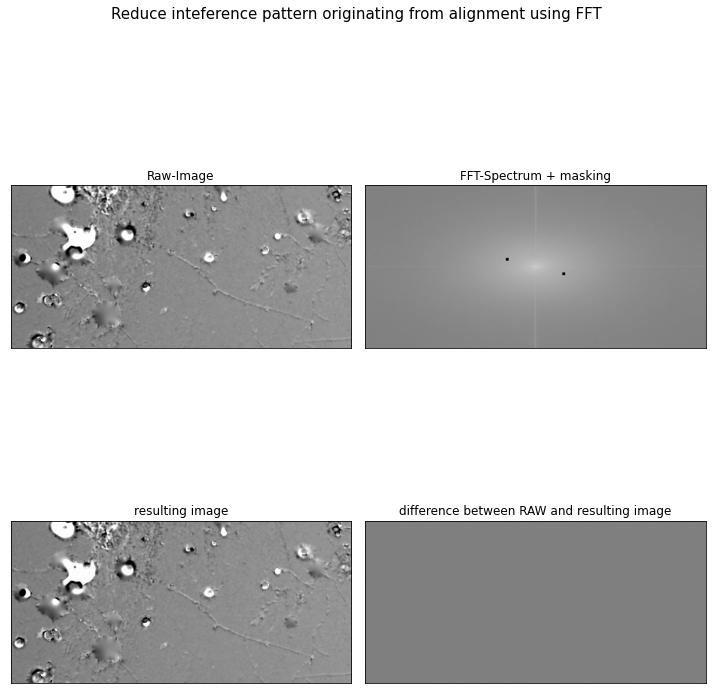

In [14]:
clip_max= 2000

img = np.rot90( np.clip(corrected_difference, -clip_max, clip_max) )
#img = img[int(img.shape[0]*2/6):int(img.shape[0]*3/6), int(img.shape[1]*3/6):int(img.shape[1]*4/6)]

fshift = np.fft.fftshift( np.fft.fft2(img) )
magnitude_spectrum  = 20*np.log(np.abs(fshift))

# try to remove frequencies which appear due to the image alignment
mask = np.ones(img.shape,np.uint8)

"""
# use if image is loaded without flipping it vertically
mask = draw_line_on_fft_mask( [90, -185], [200, -400], mask, linewidth=3 )
#mask = draw_line_on_fft_mask( [200,-30], [500, -90], mask )
mask = draw_rect_on_fft_mask( [285,-95], mask )
mask = draw_rect_on_fft_mask( [115,-350], mask )
"""

#mask = draw_line_on_fft_mask( [-90, -185], [-200, -400], mask, linewidth=3 )
#mask = draw_rect_on_fft_mask( [-285,-135], mask )
mask = kl.draw_rect_on_fft_mask( [-105,-410], mask, width=40 )
#mask = draw_line_on_fft_mask( [-285,-135], [-25, -12], mask, linewidth=2 )#[800, 260]

img_inv_fft = np.real( np.fft.ifft2( np.fft.ifftshift(fshift*mask) ) )

fig = plt.figure(figsize = (10,12),facecolor='white')
plt.subplot(221),plt.imshow( img[int(img.shape[0]*2/6):int(img.shape[0]*3/6), int(img.shape[1]*3/6):int(img.shape[1]*4/6)], cmap = 'gray')
#plt.subplot(131),plt.imshow( img, cmap = 'gray')
plt.title('Raw-Image'), plt.xticks([]), plt.yticks([])
plt.subplot(222),plt.imshow( (magnitude_spectrum*mask), cmap = 'gray')
plt.title('FFT-Spectrum + masking'), plt.xticks([]), plt.yticks([])
plt.subplot(223),plt.imshow( img_inv_fft[int(img.shape[0]*2/6):int(img.shape[0]*3/6), int(img.shape[1]*3/6):int(img.shape[1]*4/6)], cmap = 'gray')
plt.title('resulting image'), plt.xticks([]), plt.yticks([])
plt.subplot(224),plt.imshow( img_inv_fft-img, cmap = 'gray')
plt.title('difference between RAW and resulting image'), plt.xticks([]), plt.yticks([])
fig.suptitle("Reduce inteference pattern originating from alignment using FFT", fontsize=15)
plt.tight_layout()
plt.show()

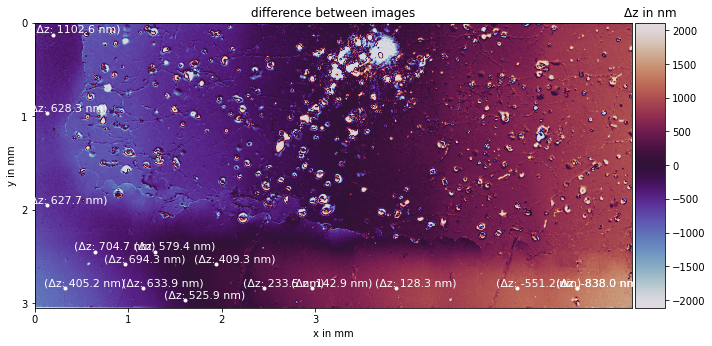

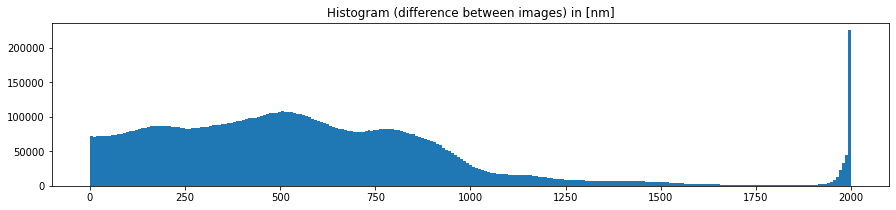

In [15]:
marker_color = "white"

disply_diff = np.clip(np.absolute(img_inv_fft), 0, clip_max)#[500:1000,500:1000]

clip_min, clip_max = np.percentile(img, clip[title], method='lower')
ticks_f, labels_f = kl.get_ticks_in_mm( files['after']['scale'], distance=1, low_label_limit=0, high_limit=20 )

fig, axis = plt.subplots(1,1, figsize = (10,10))
plot = axis.imshow( img_inv_fft, cmap='twilight' )

ticks, labels = kl.filter_label( ticks_f, labels_f, img_inv_fft.shape[0] )
axis.set_xticks(ticks, labels)
axis.set_xlabel('x in mm')

ticks, labels = kl.filter_label( ticks_f, labels_f, img_inv_fft.shape[1] )
axis.set_yticks(ticks, labels)
axis.set_ylabel('y in mm')

for i, p in enumerate(points):
	axis.plot(p[0], p[1], marker='.', color=marker_color)
	delta = background[int(p[0]), int(p[1])]-p[2]
	#txt = '({:.0f} {:.0f} {:.0f} ,d:{:.1f} nm)'.format(p[1], p[0], p[2], delta)
	txt = '(Δz: {:.1f} nm)'.format(delta)
	axis.text(p[0]-175, p[1]-20, txt, fontsize=11, color=marker_color)

axis.set_title("difference between images")

clb = fig.colorbar(plot, cax=make_axes_locatable(axis).append_axes('right', size='5%', pad=0.05), orientation='vertical')
clb.ax.set_title('Δz in nm')

plt.tight_layout()
plt.show()

plt.figure(figsize = (15,3))
plt.hist(np.absolute(disply_diff).flatten(), bins=255) #, figsize=[30,5]
plt.title("Histogram (difference between images) in [{}]".format(files['before']['unit']))
plt.show()

In [21]:
points = points.astype(int)

new point 150 100 -995 std dev: 56.472326506277
new point 1500 2000 -416 std dev: 41.43921933052799
new point 4500 2200 829 std dev: 52.042487931605606
2250914.172248207 57544.59100963827 -5430000.0 -5750669224.3784485


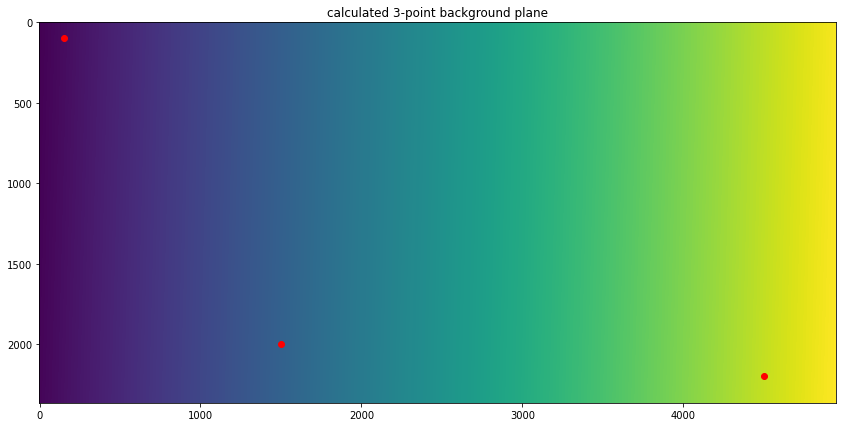

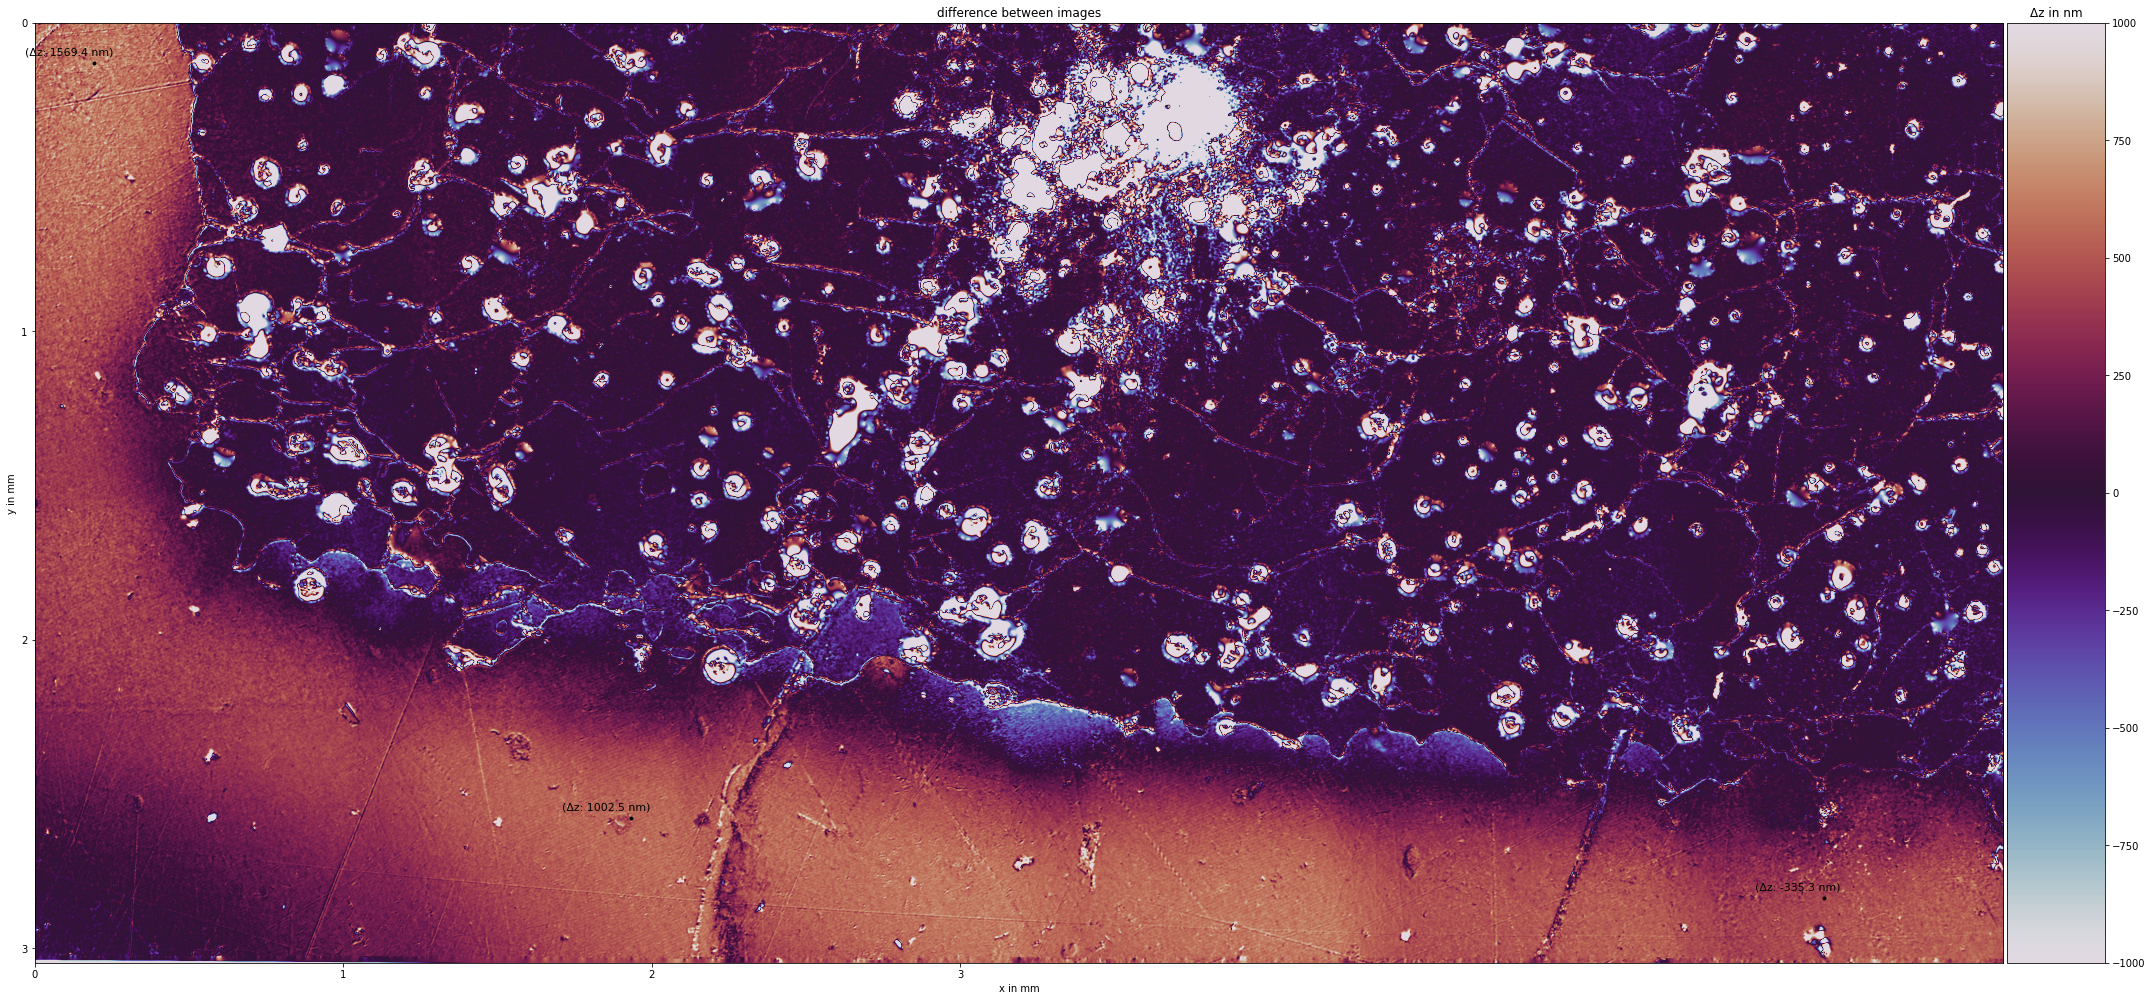

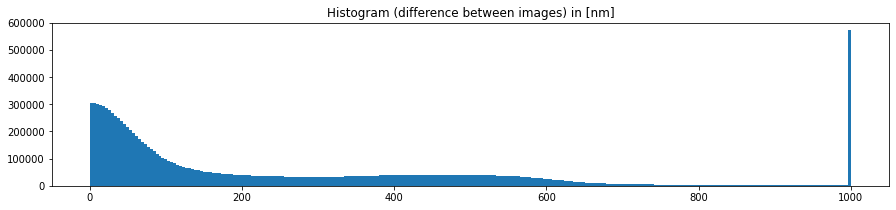

In [33]:
clip_max = 1000

background, points = kl.get_plane(corrected_difference, points[0],points[1],points[2], buffer = buffer )

img_inv_fft_corr = np.rot90( corrected_difference )-background

marker_color = "black"

disply_diff = np.clip((img_inv_fft_corr), -clip_max, clip_max)#[500:1000,500:1000]

clip_min, clip_max = np.percentile(img_inv_fft_corr, clip[title], method='lower')
ticks_f, labels_f = kl.get_ticks_in_mm( files['after']['scale'], distance=1, low_label_limit=0, high_limit=20 )

fig, axis = plt.subplots(1,1, figsize = (30,30))
plot = axis.imshow( disply_diff , cmap='twilight' )

ticks, labels = kl.filter_label( ticks_f, labels_f, img_inv_fft_corr.shape[0] )
axis.set_xticks(ticks, labels)
axis.set_xlabel('x in mm')

ticks, labels = kl.filter_label( ticks_f, labels_f, img_inv_fft_corr.shape[1] )
axis.set_yticks(ticks, labels)
axis.set_ylabel('y in mm')

for i, p in enumerate(points):
	axis.plot(p[0], p[1], marker='.', color=marker_color)
	delta = img_inv_fft_corr[int(p[1]), int(p[0])]-p[2]
	#txt = '({:.0f} {:.0f} {:.0f} ,d:{:.1f} nm)'.format(p[1], p[0], p[2], delta)
	txt = '(Δz: {:.1f} nm)'.format(delta)
	axis.text(p[0]-175, p[1]-20, txt, fontsize=11, color=marker_color)

axis.set_title("difference between images")

clb = fig.colorbar(plot, cax=make_axes_locatable(axis).append_axes('right', size='5%', pad=0.05), orientation='vertical')
clb.ax.set_title('Δz in nm')

plt.tight_layout()
plt.show()

plt.figure(figsize = (15,3))
plt.hist(np.absolute(disply_diff).flatten(), bins=255) #, figsize=[30,5]
plt.title("Histogram (difference between images) in [{}]".format(files['before']['unit']))
plt.show()